# **Introduction**

### Bank Marketing Dataset Overview

- This dataset is derived from the "Bank Marketing" dataset, enriched with additional socio-economic attributes, and focuses on telemarketing campaigns conducted by a Portuguese bank between May 2008 and November 2010. The objective is to predict whether a client will subscribe to a term deposit, based on a combination of demographic, campaign-specific, and economic features.


### Feature Groups and Descriptions
------------------------------

1. Bank Client Data
   - **age** (numeric): Age of the client.
   - **job** (categorical): Type of job.
   - **marital** (categorical): Marital status.
   - **education** (categorical): Level of education.
   - **default** (categorical): Whether the client has credit in default.
   - **housing** (categorical): Whether the client has a housing loan.
   - **loan** (categorical): Whether the client has a personal loan.

---

2. Last Contact of Current Campaign
   - **contact** (categorical): Contact communication type.
   - **month** (categorical): Month of the last contact.
   - **day_of_week** (categorical): Day of the week of the last contact.
   - **duration** (numeric): Duration of the last contact in seconds.  
     *Note: This variable has a strong influence on the target and should only be used for benchmarking models.*

---

3. Other Campaign-Related Attributes
   - **campaign** (numeric): Number of contacts performed during this campaign for the client.
   - **pdays** (numeric): Number of days since the client was last contacted from a previous campaign.
   - **previous** (numeric): Number of contacts performed before this campaign for the client.
   - **poutcome** (categorical): Outcome of the previous campaign.

---

4. Socio-Economic Context
   - **emp.var.rate** (numeric): Employment variation rate.
   - **cons.price.idx** (numeric): Consumer price index.
   - **cons.conf.idx** (numeric): Consumer confidence index.
   - **euribor3m** (numeric): Euribor 3-month rate.
   - **nr.employed** (numeric): Number of employees.

---

5. Target Variable
   - **y** (binary): Indicates if the client subscribed to a term deposit.

---

Dataset Credit
--------------

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001  
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt


# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette='viridis')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# **Data Inspection and Cleaning**

In [2]:
df = pd.read_csv('/bank-additional-full.csv', sep=';')

In [3]:
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

So we got 20 independent and 1 dependent variables with 41188 cases

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Based on this table we don't have any null values, which seems good at first, but is it? We will check that soon.

In [6]:
df.select_dtypes(include=['number']).min()

,0
age,17.000
duration,0.000
campaign,1.000
pdays,0.000
previous,0.000
emp.var.rate,-3.400
cons.price.idx,92.201
cons.conf.idx,-50.800
euribor3m,0.634
nr.employed,4963.600


Nothing feels off so far, all the minimal values seem to possible.

In [7]:
df.select_dtypes(include=['number']).max()

,0
age,98.000
duration,4918.000
campaign,56.000
pdays,999.000
previous,7.000
emp.var.rate,1.400
cons.price.idx,94.767
cons.conf.idx,-26.900
euribor3m,5.045
nr.employed,5228.100


And again, nothing suspicious from the maximum values of variables, they seem quite reasonable

Let's check some unique values to see if there are any anomalies

In [8]:
pd.set_option('display.max_colwidth', None)

df.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique())

,0
job,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
marital,"[married, single, divorced, unknown]"
education,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
default,"[no, unknown, yes]"
housing,"[no, yes, unknown]"
loan,"[no, yes, unknown]"
contact,"[telephone, cellular]"
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
day_of_week,"[mon, tue, wed, thu, fri]"
poutcome,"[nonexistent, failure, success]"


So here it is, we found that we have some Null values, but they are indicated with 'unknown' value. Let's fix it

Let's start with a 'job' column. it has multiple values and we have some options of imputation methods that can be used.

In [9]:
df['job'].value_counts()

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


I think using random imputation would be suitable and reasonable, because number of null values is not that high and I don't see any significant correlation between job and other columns.

In [10]:
df['job'] = df['job'].replace('unknown', np.nan)

df['job'] = df['job'].apply(lambda x: np.random.choice(df['job'].dropna().unique()) if pd.isna(x) else x)

In [11]:
df['job'].value_counts()

,count
job,
admin.,10460
blue-collar,9294
technician,6766
services,3994
management,2953
retired,1754
entrepreneur,1483
self-employed,1450
housemaid,1090


Now let's take care of 'marital' column

In [12]:
df['marital'].value_counts()

,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


Since the count of unknown values is so insignificant, we can just use mode imputation

In [13]:
df['marital'] = df['marital'].replace('unknown', np.nan)

imputer = SimpleImputer(strategy='most_frequent')

df[['marital']] = imputer.fit_transform(df[['marital']])

In [14]:
df['marital'].value_counts()

,count
marital,
married,25008
single,11568
divorced,4612


Done! Now impute the education column

In [15]:
df['education'].value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


There are quite a lot of unknown values as you can see, so we should be more careful about choosing the imputation method, not to end up with significant statistical changes. I think education have to be most correlated with the job variable, obviously, so correlation-based imputation could be suitable

In [16]:
df['education'] = df['education'].replace('unknown', np.nan)

df['education'] = (
    df.groupby('job')['education']
    .apply(lambda group: group.fillna(group.mode()[0] if not group.mode().empty else np.nan))
    .reset_index(drop=True)
)

In [17]:
df['education'].value_counts()

,count
education,
university.degree,12708
high.school,9858
basic.9y,6513
professional.course,5461
basic.4y,4338
basic.6y,2292
illiterate,18


In [18]:
df['default'].value_counts()

,count
default,
no,32588
unknown,8597
yes,3


So taking a look at the default value counts, it seems like imputing is not needed, because the column itself does not give us any information or change, so we will have to just delete it, which we will explain and do soon

In [19]:
df['housing'].value_counts()

,count
housing,
yes,21576
no,18622
unknown,990


In [20]:
df['housing'] = df['housing'].replace('unknown', pd.NA).ffill()

In [21]:
df['housing'].value_counts()

,count
housing,
yes,22072
no,19116


I used forward fill because the amount of unknown values was not that big, so forward fill would be alright in this case

In [22]:
df['loan'].value_counts()

,count
loan,
no,33950
yes,6248
unknown,990


Let's use mode imputating for this one

In [23]:
df['loan'] = df['loan'].replace('unknown', np.nan)

imputer = SimpleImputer(strategy='most_frequent')

df[['loan']] = imputer.fit_transform(df[['loan']])

In [24]:
df['loan'].value_counts()

,count
loan,
no,34940
yes,6248


And we done with filling the missing values!

In [25]:
pd.set_option('display.max_colwidth', None)

df.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique())

,0
job,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, entrepreneur, student]"
marital,"[married, single, divorced]"
education,"[basic.6y, professional.course, high.school, university.degree, basic.9y, basic.4y, illiterate]"
default,"[no, unknown, yes]"
housing,"[no, yes]"
loan,"[no, yes]"
contact,"[telephone, cellular]"
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
day_of_week,"[mon, tue, wed, thu, fri]"
poutcome,"[nonexistent, failure, success]"


Now let's check if we have any significant outliers in out numerical data

I will use Percentile-Based method to detect if any values that are outside the upper and lower percentiles can be considered as the outliers

In [26]:
lower_percentile = 1
upper_percentile = 99

numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

for column in numerical_columns:
    lower_bound = df[column].quantile(lower_percentile / 100)
    upper_bound = df[column].quantile(upper_percentile / 100)

    lower_outliers = df[df[column] < lower_bound]
    upper_outliers = df[df[column] > upper_bound]

    print(f"\nOutlier Detection Summary for '{column}':")
    print(f"--------------------------------------------")
    print(f"Lower Bound (percentile {lower_percentile}%): {lower_bound}")
    print(f"Upper Bound (percentile {upper_percentile}%): {upper_bound}")

    if len(lower_outliers) > 0 or len(upper_outliers) > 0:
        if len(lower_outliers) > 0:
            print(f"Top 5 Lower Bound Outliers:")
            print(lower_outliers[[column]].nsmallest(5, column))

        if len(upper_outliers) > 0:
            print(f"Top 5 Upper Bound Outliers:")
            print(upper_outliers[[column]].nlargest(5, column))
    else:
        print(f"No outliers detected.")



Outlier Detection Summary for 'age':
--------------------------------------------
Lower Bound (percentile 1%): 23.0
Upper Bound (percentile 99%): 71.0
Top 5 Lower Bound Outliers:
       age
37140   17
37539   17
37558   17
37579   17
38274   17
Top 5 Upper Bound Outliers:
       age
38452   98
38455   98
27826   95
38921   94
39655   92

Outlier Detection Summary for 'duration':
--------------------------------------------
Lower Bound (percentile 1%): 11.0
Upper Bound (percentile 99%): 1271.1299999999974
Top 5 Lower Bound Outliers:
       duration
6251          0
23031         0
28063         0
33015         0
28239         1
Top 5 Upper Bound Outliers:
       duration
24091      4918
22192      4199
40537      3785
13820      3643
7727       3631

Outlier Detection Summary for 'campaign':
--------------------------------------------
Lower Bound (percentile 1%): 1.0
Upper Bound (percentile 99%): 14.0
Top 5 Upper Bound Outliers:
       campaign
4107         56
13447        43
18728    

So after checking all the possible outliers of our data, I think pretty much all of them seem to be reasonable and happenable amounts, so it means we don't have any outliers

# **Explanatory Data Analysis**

## **Univariate Analysis**

Now, after we've fixed all the missing values and haven't detected any outliers in our data, it is time we start Explanatory Data Analysis, to find some important relationships and analyze our findings for further decisions

In [27]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.6y,professional.course,high.school,university.degree,university.degree
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


Let's take a look again on our categorical data values

In [28]:
pd.set_option('display.max_colwidth', None)

df.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique())

,0
job,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, entrepreneur, student]"
marital,"[married, single, divorced]"
education,"[basic.6y, professional.course, high.school, university.degree, basic.9y, basic.4y, illiterate]"
default,"[no, unknown, yes]"
housing,"[no, yes]"
loan,"[no, yes]"
contact,"[telephone, cellular]"
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
day_of_week,"[mon, tue, wed, thu, fri]"
poutcome,"[nonexistent, failure, success]"


Everything seems to be alright, I know that default column has the unknown value still, but we will change that soon, and explain how, but now lets take a look at some numerical variables and check their statistical measures.

In [29]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Based on this little description table, We can notice some suspicious measures. For example, campaign column should be checked, because its max value is way larger than the actual mean. One thing I noticed that variable pdays's min value is 0 and max is 999, but the mean is so skewed and is almost equal to max, which should be investigated, same for the column previous, of which mean is so close to min value and far from max, which also indicated the skewness, but to the opposite side. Other variables seem to be normal at the first sight

So based on the explanation above we should investigate the following variables:
- campaign
- pdays
- previous

Text(0.5, 1.0, 'Countplot of Campaign')

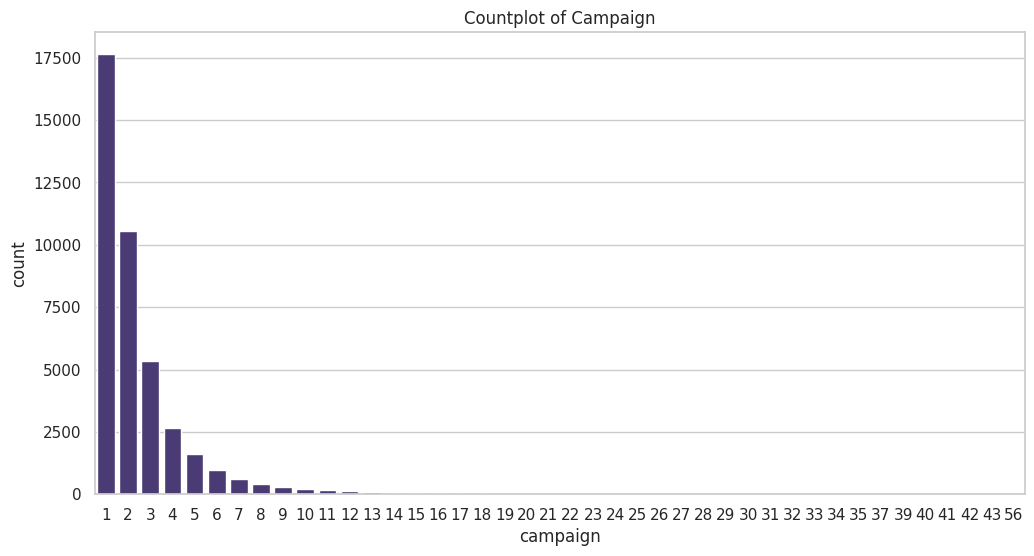

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='campaign', data=df)
plt.title('Countplot of Campaign')

So it turns out the real reason was that campaign days are usually low that is why out mean was lower than expected

Text(0.5, 1.0, 'Countplot of Pdays')

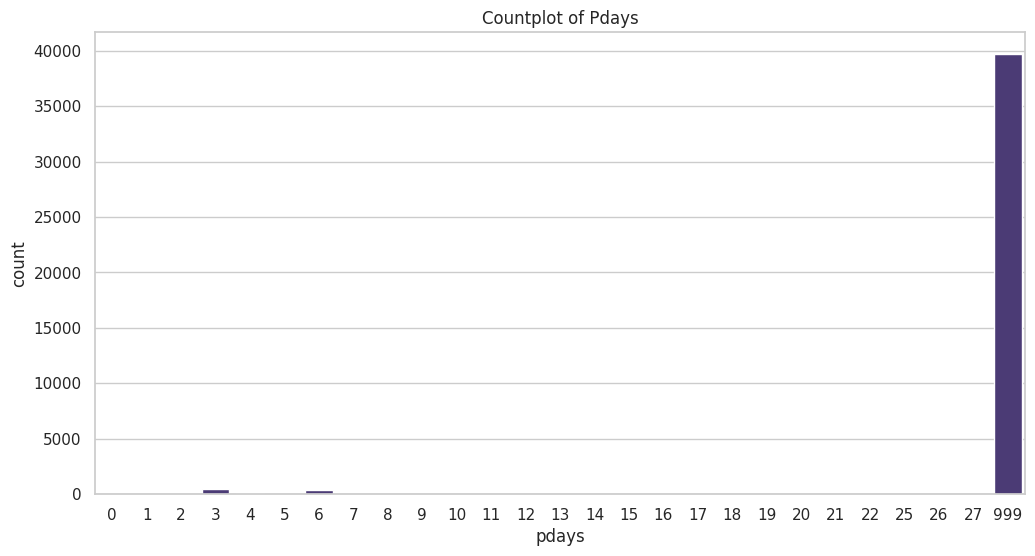

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='pdays',data=df)
plt.title('Countplot of Pdays')

Text(0.5, 1.0, 'Violinplot of Previous')

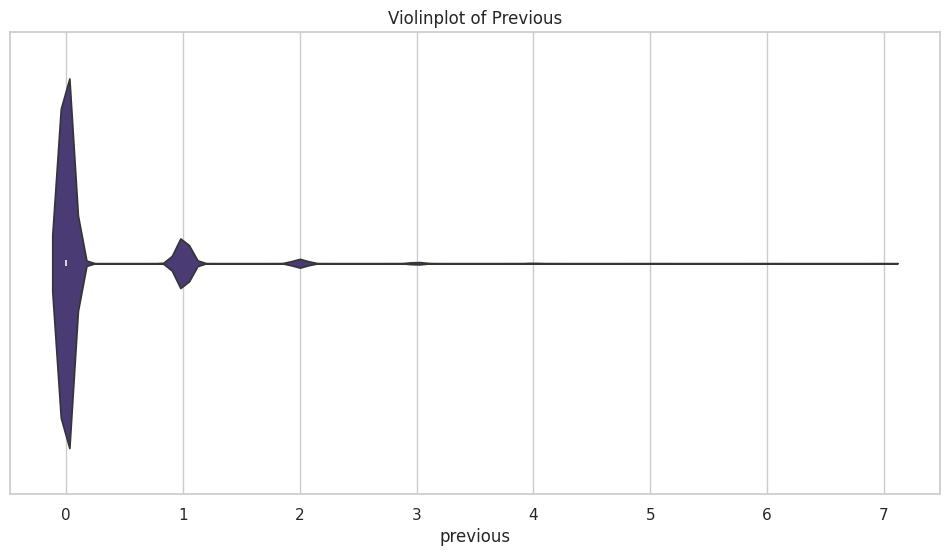

In [32]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='previous',data=df)
plt.title('Violinplot of Previous')

These plots explains perfectly why means of pdays and previous differed from their bounds. So we keep in mind that these columns have huge value inbalance.

Now let's take a look at the categorical values and their distributions

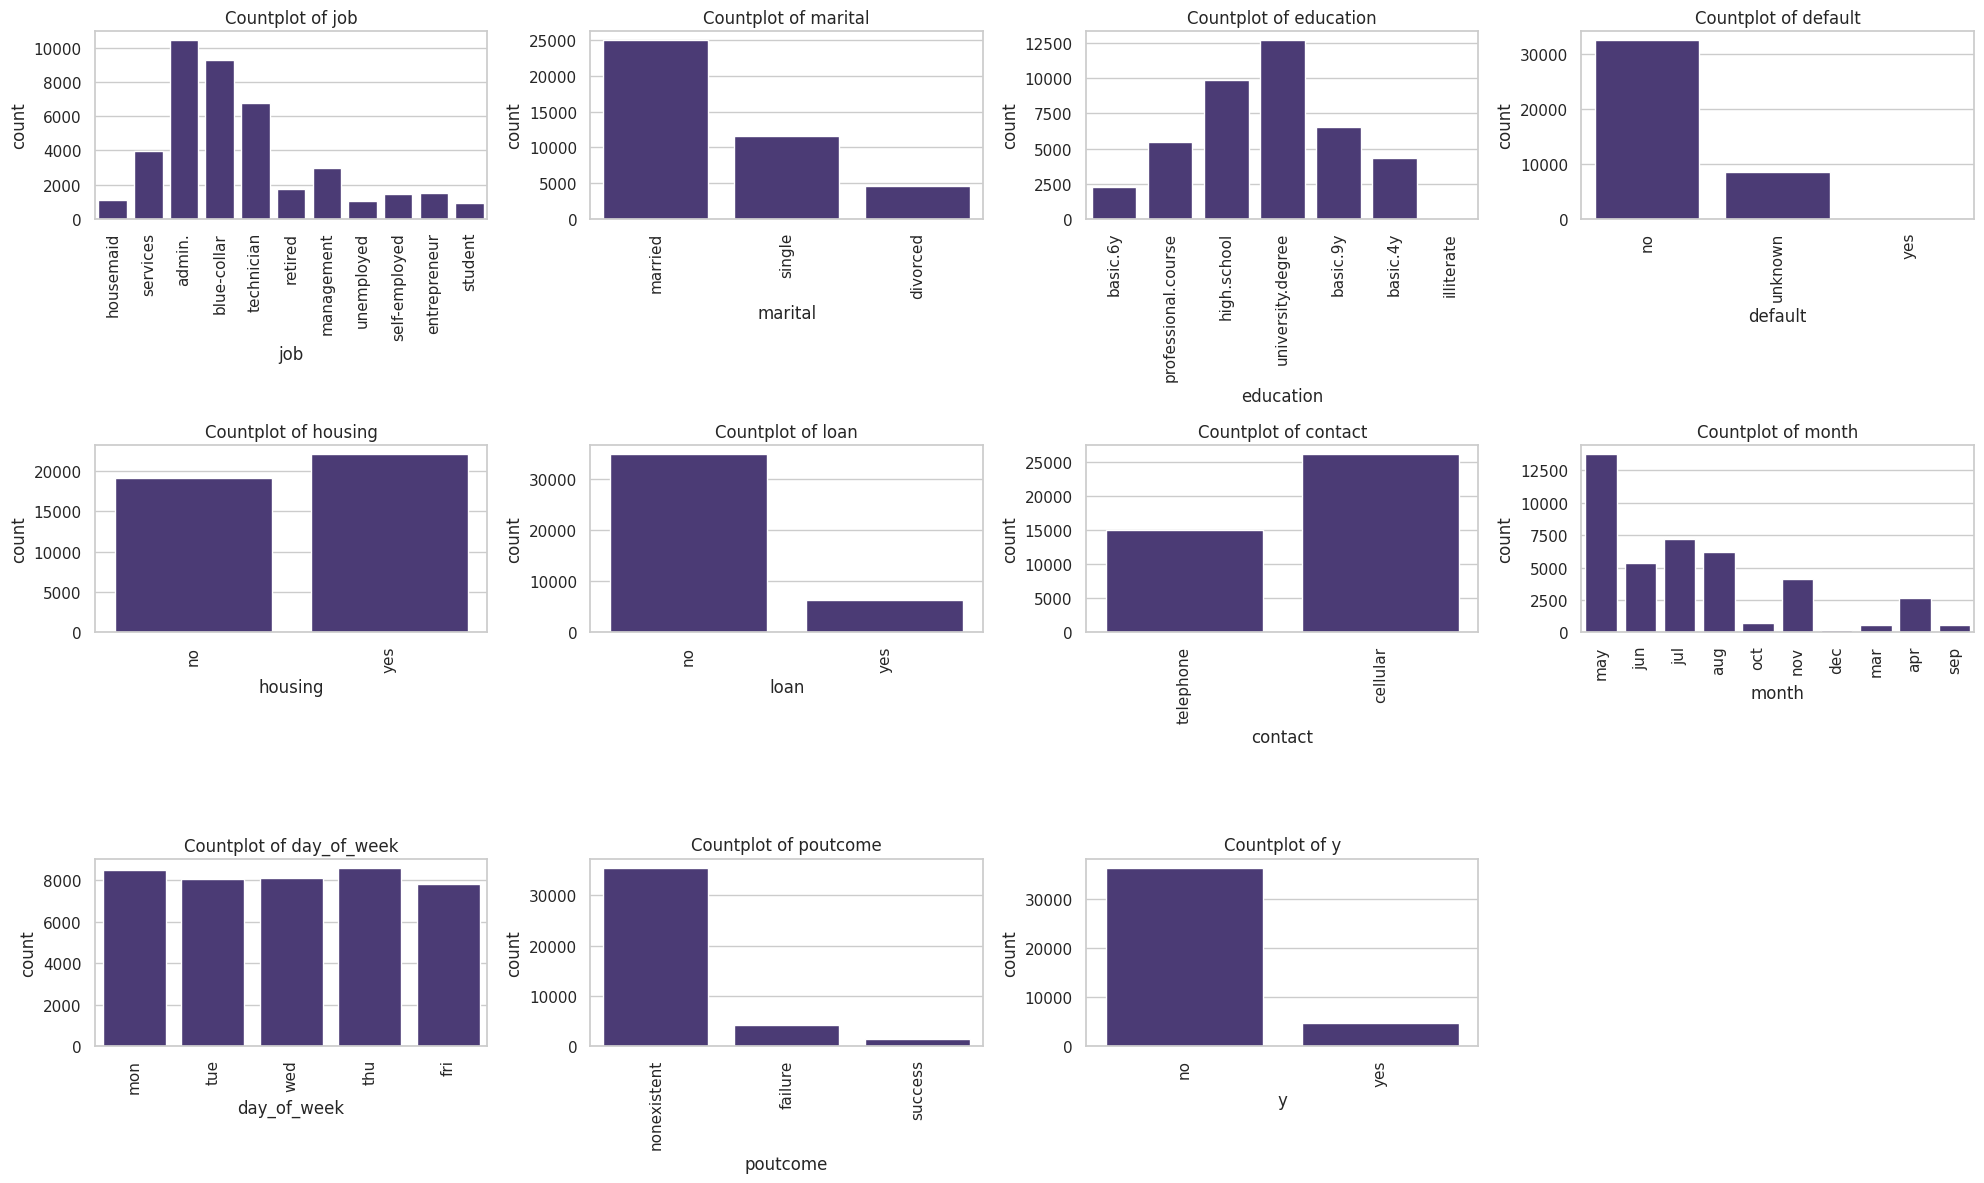

In [33]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome', 'y']

plt.figure(figsize=(20, 12))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)

plt.tight_layout()

Here I just didn't waste time and plotted all of them with subplotting

Okay, after taking a close look, we can see that the variable default has enormous value inbalance as we already emphasized, all other categorical variables seem to have decent distributions.

Usually we should get rid of those inbalanced variables, but first I prefer to make Multivariate and Bivariate Analysis before making any important assumptions

## **Multivariate Analysis**

Text(0.5, 1.0, 'Scatterplot of Age vs. Duration')

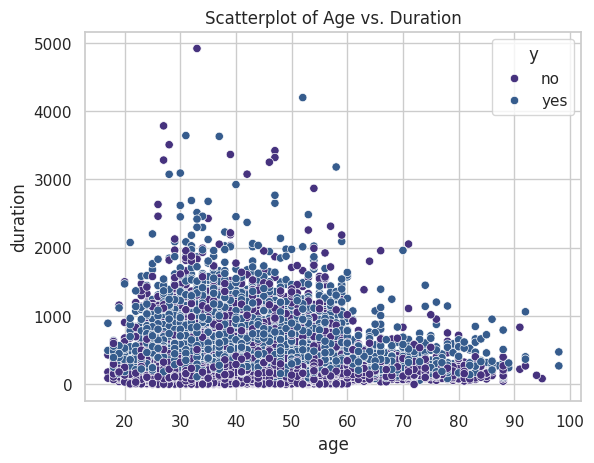

In [34]:
sns.scatterplot(x='age', y='duration', data=df,hue='y')
plt.title('Scatterplot of Age vs. Duration')

Based on this plot there is not much of a correlation between age and duration of last contact

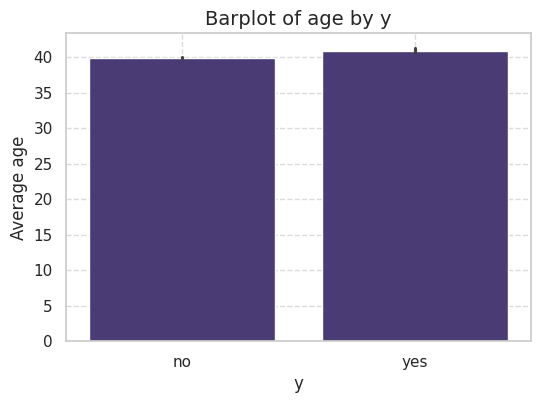

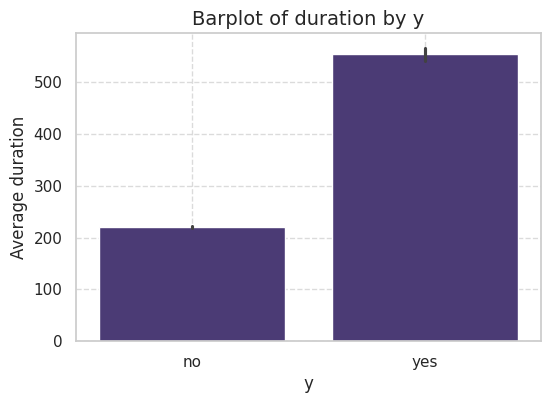

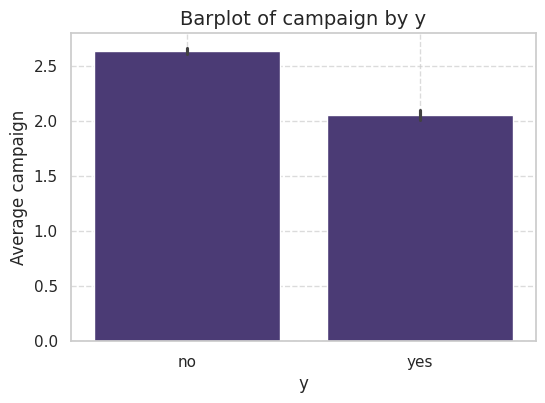

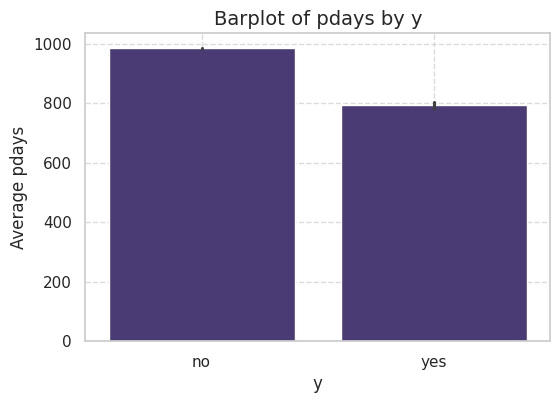

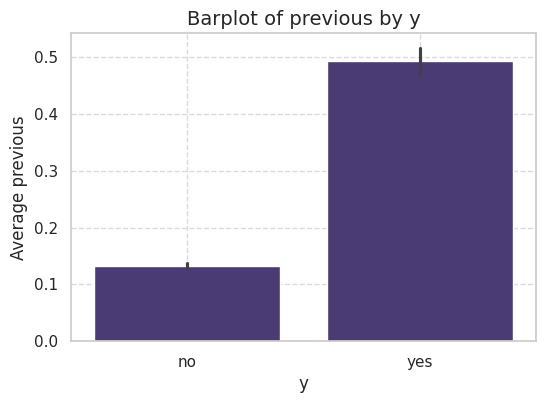

In [35]:
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='y', y=col, data=df)
    plt.title(f'Barplot of {col} by y', fontsize=14)
    plt.xlabel('y', fontsize=12)
    plt.ylabel(f'Average {col}', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

By this graphs I wanted to check how those numerical values influenced the outcome. It turned out that age did not matter whether clients accepted term deposits or not, but contact duration did, because the longer it was on average, more people accepted the term deposit. Also campaign did not really influenced the outcome, as well as pdays variable, but the number of contacts on average made a huge difference because the more bank contacted clients, more likely they were to accept the term deposit campaign offer

Text(0.5, 1.0, 'Scatterplot of Duration vs. Previous')

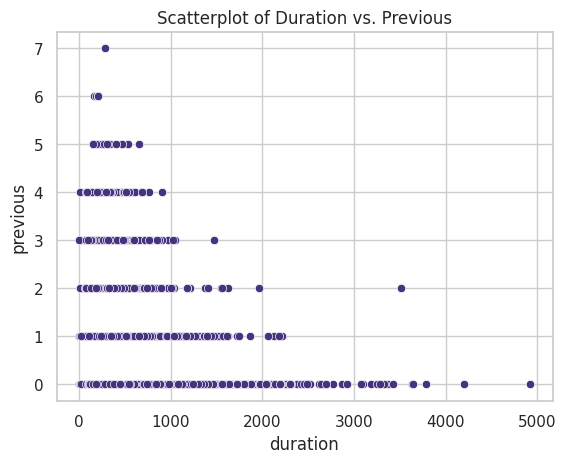

In [36]:
sns.scatterplot(x='duration', y='previous',data=df)
plt.title('Scatterplot of Duration vs. Previous')

So based on this scatter plot, we can see that the less contact bank made with clients before the campaign, the more they were likely to be longer in terms of contact duration

NOTE: I tried plotting pairplot, but it took so long and still didn't plot so I just stopped it

<Axes: xlabel='loan', ylabel='campaign'>

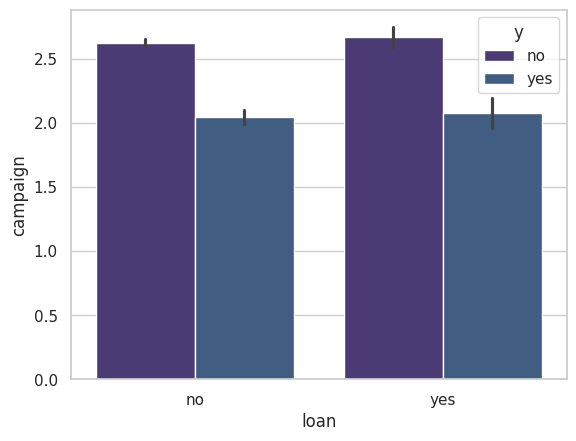

In [37]:
sns.barplot(x='loan',y='campaign',data=df,hue='y')

According to this bar plot, having loan makes no difference in terms of campaign contacts and the outcome

Text(0.5, 1.0, 'Education vs. Duration')

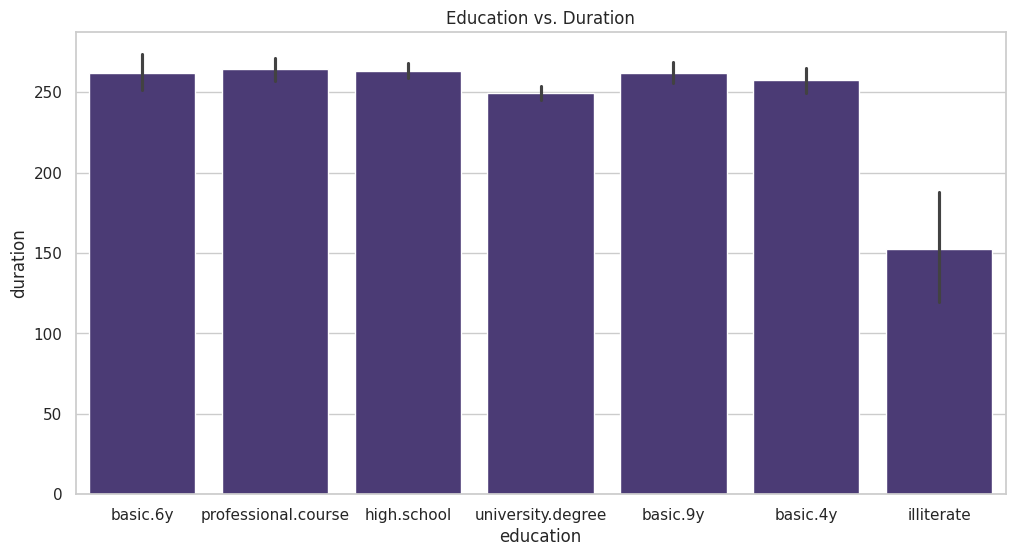

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x='education',y='duration',data=df)
plt.title('Education vs. Duration')

Based on this graph, bank had to make longer duration calls to illiterate clients, unlike the other education levels

Text(0.5, 1.0, 'Correlation Heatmap')

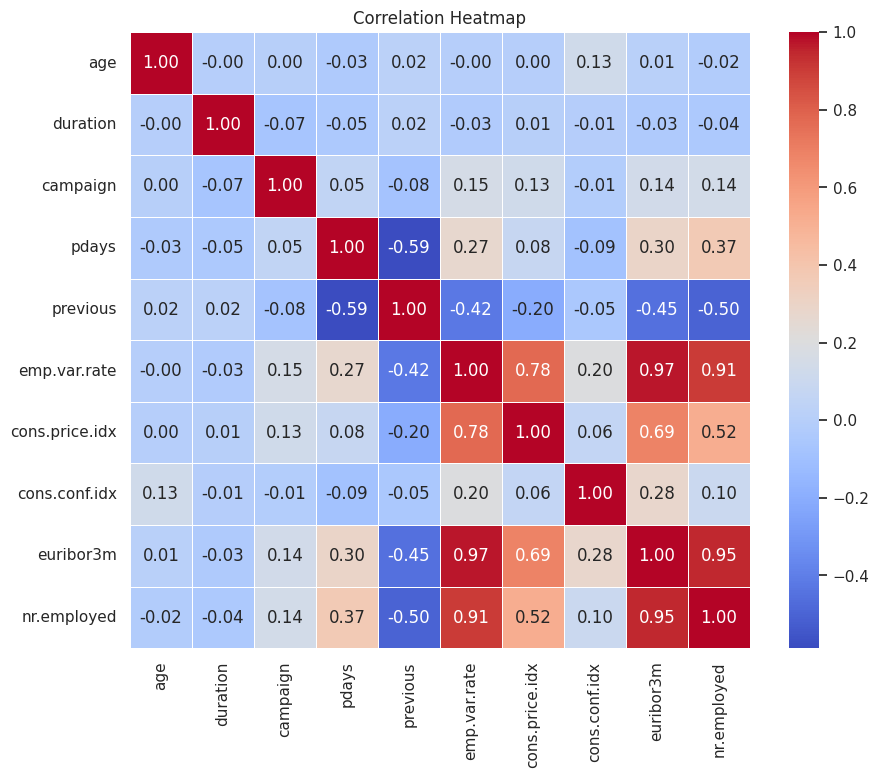

In [39]:
df_numeric = df.select_dtypes(include=['number'])

corr = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

So after all the plotting and analyses, all the variables seem to be useful and insightful, except the default, which I am going to delete.

In [40]:
df = df.drop('default', axis=1)

# **Categorical Variable Encoding**

First we start with job encoding, because of many unique categories I think that most suitable method of encoding for job column is Target Encoding, but before we do that lets label encode the target (y)

In [41]:
encoder = LabelEncoder()

df['y'] = encoder.fit_transform(df['y'])

In [42]:
job_target_mean = df.groupby('job')['y'].mean()

df['job'] = df['job'].map(job_target_mean)

Job and y done! now let's encode marital. I think the most suitable encoding method for marital variable is one-hot encoding

In [43]:
df = pd.get_dummies(df, columns=['marital'], drop_first=False)

In [44]:
df['marital_divorced'] = df['marital_divorced'].astype(int)
df['marital_married'] = df['marital_married'].astype(int)
df['marital_single'] = df['marital_single'].astype(int)

In [45]:
df = df.drop('marital_single', axis=1)

Done! We One-hot encoded the marital variable, the reason why i dropped the third option, single, is that it was not necessary

Now let's encode education. I thing ordinal encoding is suitable for it, because education is ordinal data

In [46]:
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']

encoder = OrdinalEncoder(categories=[education_order])

df['education'] = encoder.fit_transform(df[['education']]).astype(int)

Education done! Let's now encode contact, housing and loan, all of them should be label encoded

In [47]:
encoder = LabelEncoder()

df['housing'] = encoder.fit_transform(df['housing'])

df['loan'] = encoder.fit_transform(df['loan'])

df['contact'] = encoder.fit_transform(df['contact'])

Now let's encode month, using target encoding, because no other encoding method would give us precise statistical outcomes, except one-hot method, which I do not prefer because we would have so many dimensions.



In [48]:
df['month'] = df.groupby('month')['y'].transform('mean')

Done! Now lets do the target encoding for weekdays too

In [49]:
df['day_of_week'] = df.groupby('day_of_week')['y'].transform('mean')

And lastly, let's encode poutcome column, using one-hot encoding

In [50]:
df = pd.get_dummies(df, columns=['poutcome'], drop_first=True)

In [51]:
df['poutcome_nonexistent'] = df['poutcome_nonexistent'].astype(int)
df['poutcome_success'] = df['poutcome_success'].astype(int)

Encoding Done!

# **Data Scaling**

Before we do dimensionality reduction, let's first scale our data

In [52]:
df.dtypes

,0
age,int64
job,float64
education,int64
housing,int64
loan,int64
contact,int64
month,float64
day_of_week,float64
duration,int64
campaign,int64


Let's see which values should we scale

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000000,32.000000,38.000000,47.000000,98.000000
job,41188.0,0.112654,0.047761,0.069184,0.081122,0.108484,0.130019,0.307182
education,41188.0,4.162523,1.635846,0.000000,3.000000,4.000000,6.000000,6.000000
housing,41188.0,0.535884,0.498717,0.000000,0.000000,1.000000,1.000000,1.000000
loan,41188.0,0.151695,0.358729,0.000000,0.000000,0.000000,0.000000,1.000000
contact,41188.0,0.365252,0.481507,0.000000,0.000000,0.000000,1.000000,1.000000
month,41188.0,0.112654,0.086756,0.064347,0.064347,0.090466,0.106021,0.505495
day_of_week,41188.0,0.112654,0.007966,0.099483,0.108087,0.116671,0.117800,0.121188
duration,41188.0,258.285010,259.279249,0.000000,102.000000,180.000000,319.000000,4918.000000
campaign,41188.0,2.567593,2.770014,1.000000,1.000000,2.000000,3.000000,56.000000


So we have to scale all the continues variables, and keep binary ones unchanged

In [54]:
continuous_columns = [
    'age', 'job', 'education', 'month', 'day_of_week', 'duration',
    'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
    'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()

df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,-1.880382e-16,1.000012,-2.209365,-0.769980,-0.194227,0.669404,5.563310
job,41188.0,-6.072425e-17,1.000012,-0.910168,-0.660226,-0.087323,0.363586,4.073021
education,41188.0,1.231305e-16,1.000012,-2.544600,-0.710664,-0.099352,1.123272,1.123272
housing,41188.0,5.358842e-01,0.498717,0.000000,0.000000,1.000000,1.000000,1.000000
loan,41188.0,1.516947e-01,0.358729,0.000000,0.000000,0.000000,0.000000,1.000000
contact,41188.0,3.652520e-01,0.481507,0.000000,0.000000,0.000000,1.000000,1.000000
month,41188.0,-1.490504e-16,1.000012,-0.556816,-0.556816,-0.255761,-0.076454,4.528141
day_of_week,41188.0,2.560769e-15,1.000012,-1.653443,-0.573300,0.504231,0.645960,1.071250
duration,41188.0,-1.397348e-17,1.000012,-0.996177,-0.602774,-0.301937,0.234171,17.972019
campaign,41188.0,-7.590531e-17,1.000012,-0.565922,-0.565922,-0.204909,0.156105,19.289818


And done! We have fully imputed, cleaned, encoded and standardized data, ready to do dimensionality reduction!

# **Dimensionality Reduction**

Finding the number of components that explain 95% of variance

Number of components explaining 95% of the variance: 13


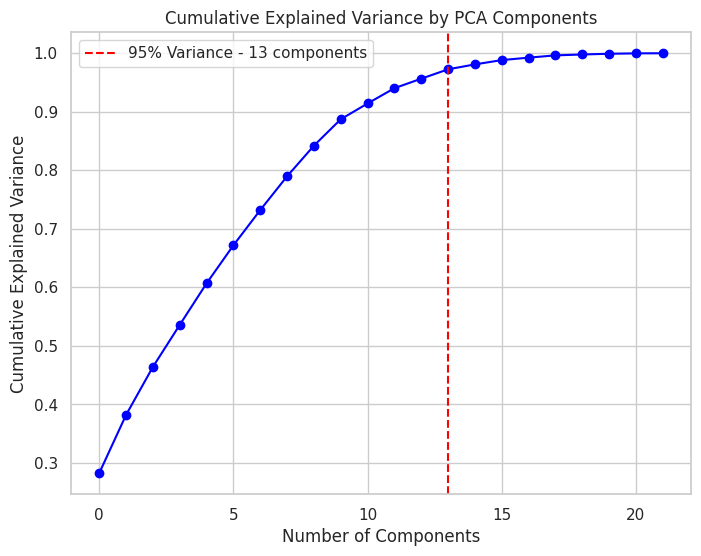

In [56]:
pca = PCA()
pca.fit(df)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(explained_variance >= 0.95) + 1

plt.figure(figsize=(8, 6))
plt.plot(explained_variance, marker='o', linestyle='-', color='b')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'95% Variance - {n_components_95} components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid(True)

print(f"Number of components explaining 95% of the variance: {n_components_95}")

Applying PCA for n_components = 13

In [57]:
pca = PCA(n_components=13)
X_pca = pca.fit_transform(df)

Applying  SVD

In [58]:
svd = TruncatedSVD(n_components=13)
X_svd = svd.fit_transform(df)

Lets plot cumulative explained variance for PCA and SVD

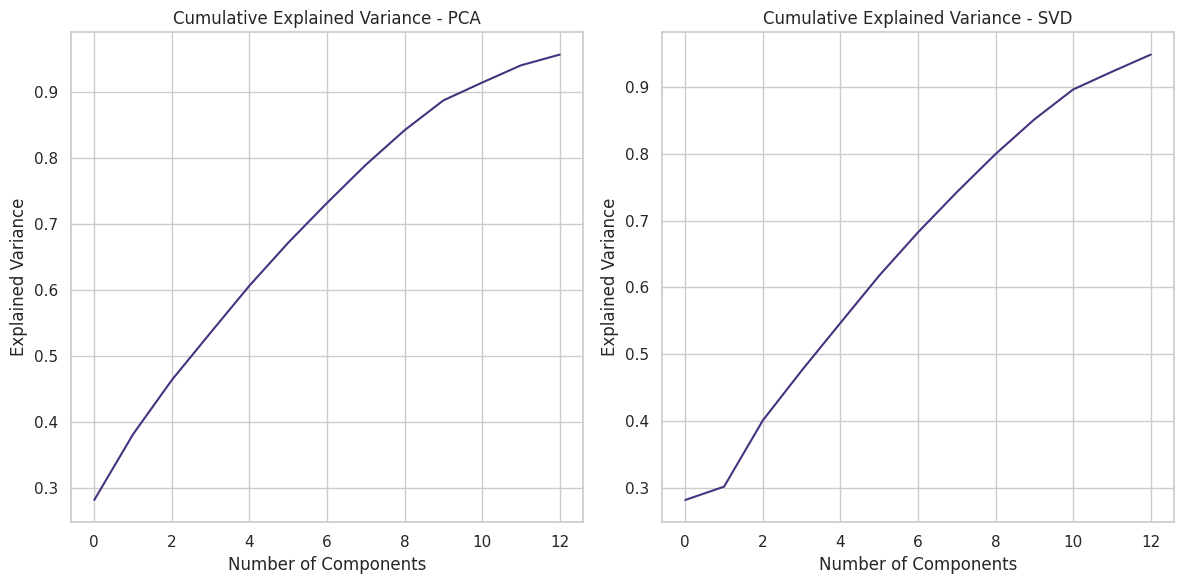

In [59]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance - PCA')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.title('Cumulative Explained Variance - SVD')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

plt.tight_layout()

Applying t-SNE with 5,25 and 50 perplexities and graph them in 2D

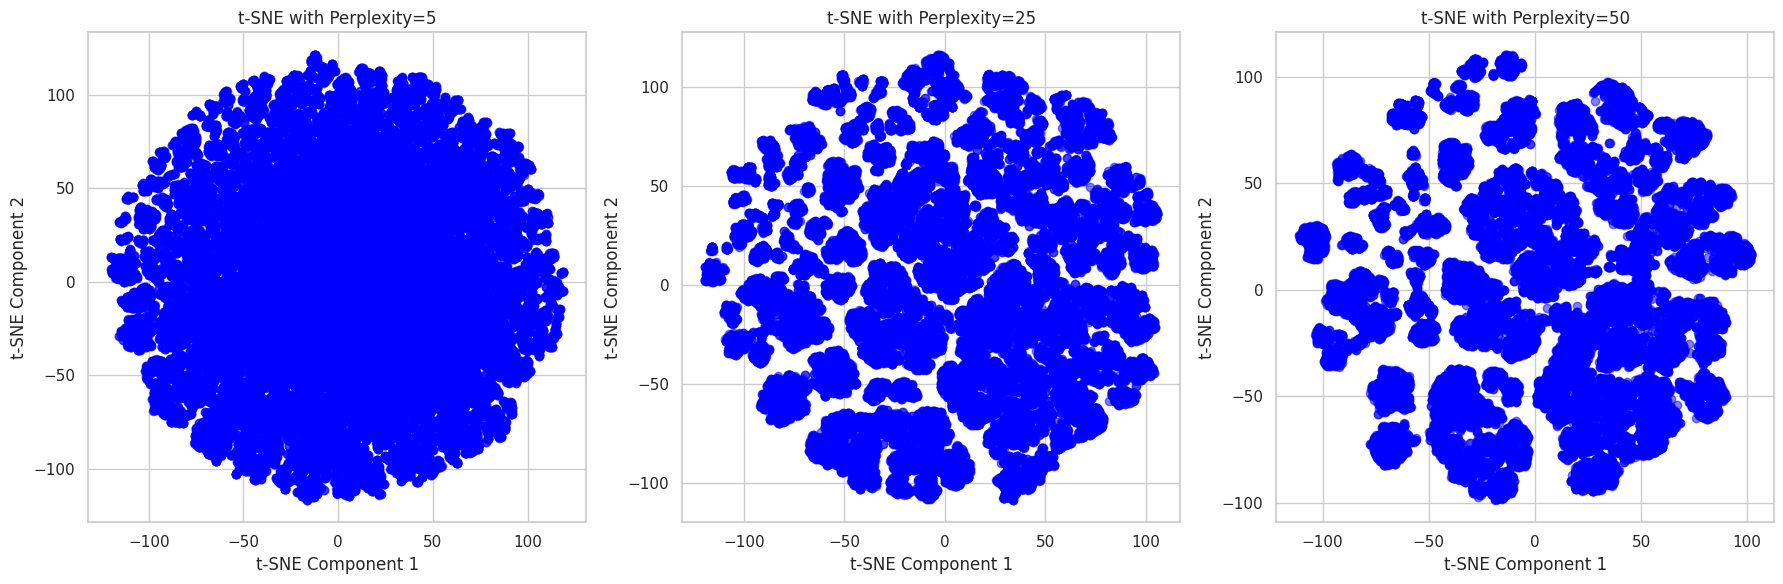

In [60]:
perplexities = [5, 25, 50]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(df)

    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c='blue')
    axes[i].set_title(f't-SNE with Perplexity={perplexity}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')
    axes[i].grid(True)

plt.tight_layout()

And voalah! Here we got all cleaned, imputed, analyzed, encoded, standardized and dimensionally reduced dataset, completely ready to train ML models on.